    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


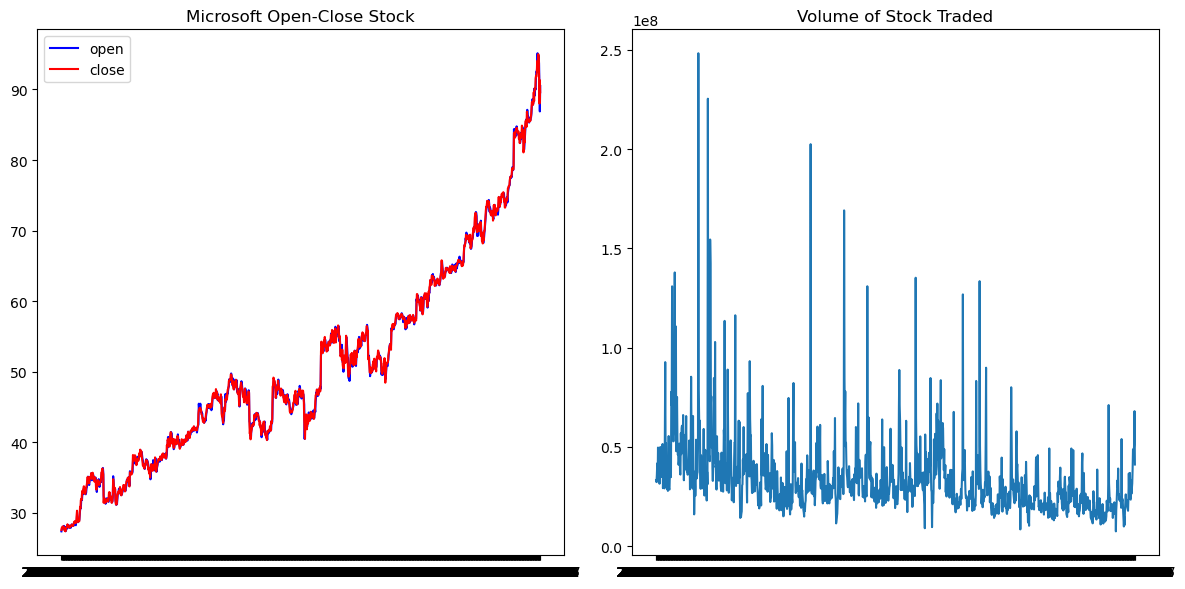

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_8 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58369 (228.00 KB)
Trainable params: 58369 (228.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/11


2023-10-06 02:37:11.047766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-06 02:37:11.186065: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_12.


36/36 [==============================] - 204s 6s/step - loss: 0.2923 - root_mean_squared_error: 0.4431
Epoch 2/11
36/36 [==============================] - 206s 6s/step - loss: 0.1139 - root_mean_squared_error: 0.1623
Epoch 3/11
36/36 [==============================] - 212s 6s/step - loss: 0.0904 - root_mean_squared_error: 0.1280
Epoch 4/11
36/36 [==============================] - 203s 6s/step - loss: 0.0884 - root_mean_squared_error: 0.1221
Epoch 5/11
36/36 [==============================] - 203s 6s/step - loss: 0.0731 - root_mean_squared_error: 0.1016
Epoch 6/11
36/36 [==============================] - 201s 6s/step - loss: 0.0676 - root_mean_squared_error: 0.0931
Epoch 7/11
36/36 [==============================] - 203s 6s/step - loss: 0.0674 - root_mean_squared_error: 0.0948
Epoch 8/11
36/36 [==============================] - 208s 6s/step - loss: 0.0686 - root_mean_squared_error: 0.0919
Epoch 9/11
36/36 [==============================] - 274s 8s/step - loss: 0.0604 - root_mean_squared

2023-10-06 03:30:16.763331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 306ms/step


/var/folders/yr/kz87x3hn58v86nrhp2d26l_h0000gn/T/ipykernel_39715/4156329706.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


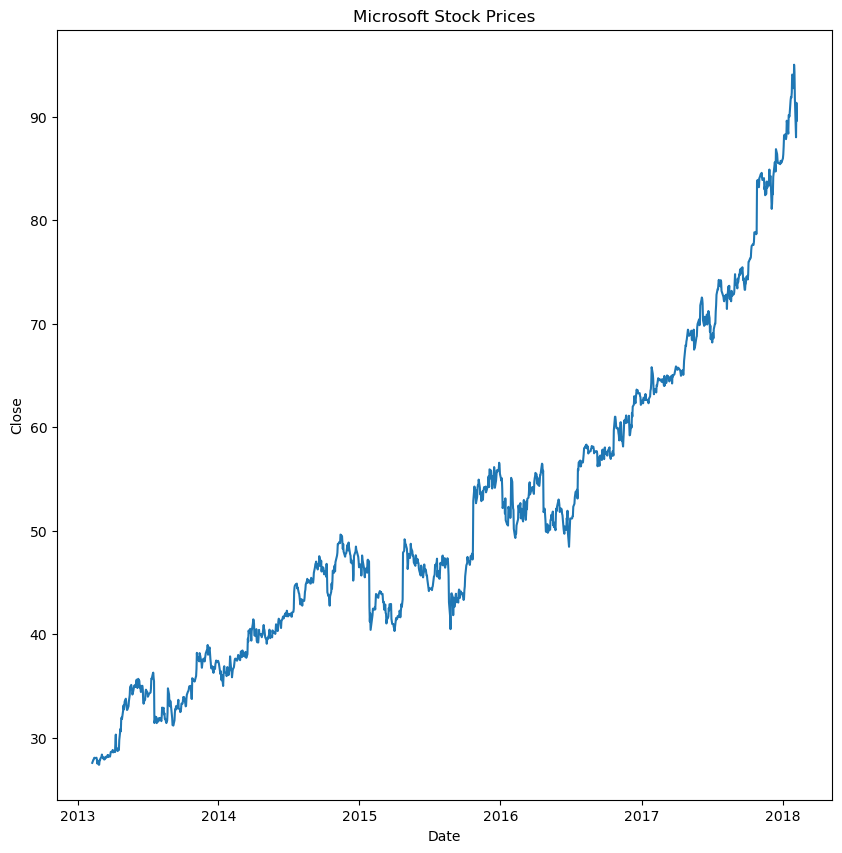

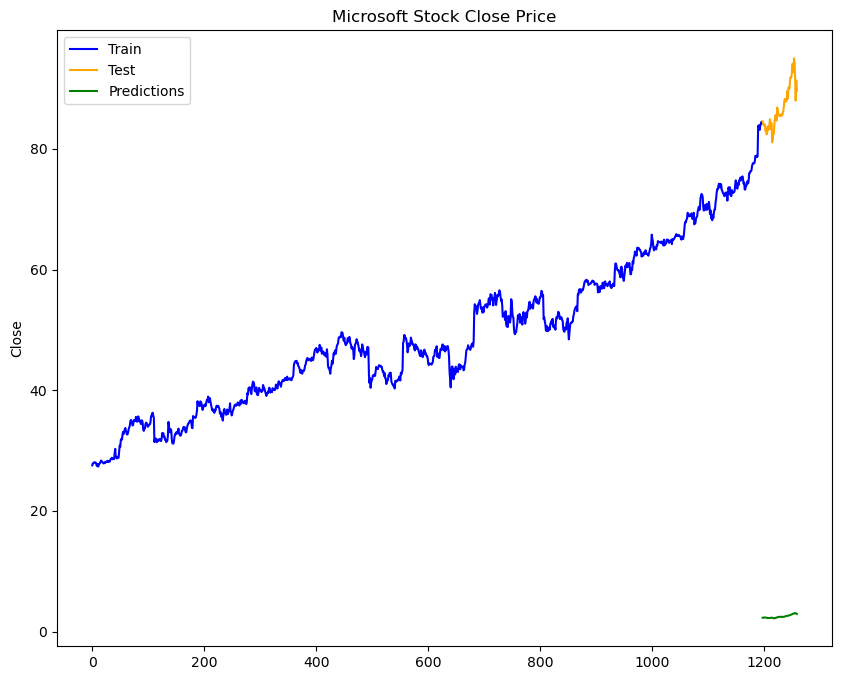

In [5]:
# Akhilesh Nevatia
# Note Microsoft Stock values used in the project are dummy values taken from the internet
# Used TensorFlow (by Google)
# TensorFlow makes it easy to implement Time Series forecasting data
# long term short term Memory cells ( Gated Recurrent Neural Network Trained )
import tensorflow as tf
from tensorflow import keras

# Importing all necessary libraries to make project implementation easier
import pandas as pd
# Pandas – This library helps to load the data frame in a 2D array format
# and has multiple functions to perform analysis tasks in one go.

import numpy as np
# Numpy – Numpy arrays are very fast and can perform large computations
# in a very short time.

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
# Sklearn – This module contains multiple libraries having pre-implemented
# functions to perform tasks from data preprocessing to model development
# and evaluation.

import seaborn as sns

from datetime import datetime

#FILE CONTAINS HLOC Values for microsoft stock from a while ago
microsoft = pd.read_csv('MicrosoftStock.csv')
print(microsoft.head())


#WE GET MICROSOFT dummy/online provided STOCK PRICES OVER THE YEARS DISPLAYED AS A GRAPH (OPEN AND CLOSE VALUES)

# Creating a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Microsoft Open-Close Stock
axs[0].plot(microsoft['date'], microsoft['open'], color="blue", label="open")
axs[0].plot(microsoft['date'], microsoft['close'], color="red", label="close")
axs[0].set_title("Microsoft Open-Close Stock")
axs[0].legend()

# Plot 2: Volume of Stock Traded
axs[1].plot(microsoft['date'], microsoft['volume'])
axs[1].set_title("Volume of Stock Traded")

# Adjusting the layout to avoid overlapping
plt.tight_layout()

# Display the plots
plt.show()

microsoft['date'] = pd.to_datetime(microsoft['date']) #done to make sure date column is treated as a DateFrame 

#We will make predition based on data from the following time period 
prediction = microsoft.loc[(microsoft['date']
                            > datetime(2013, 1, 1))
                            & (microsoft['date']
                            < datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['date'], microsoft['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")

#BUILDING TRAINING DATASET

# prepare the training set samples
# Extract the 'close' column from the 'microsoft' DataFrame and assign it to the 'msft_close' DataFrame.
msft_close = microsoft.filter(['close'])

# Convert the 'msft_close' DataFrame into a NumPy array and assign it to the 'dataset' variable.
dataset = msft_close.values

# Calculate the number of samples to be used for training the model (95% of the total dataset length).
training = int(np.ceil(len(dataset) * 0.95))

# Scale the data using StandardScaler from scikit-learn.
ss = StandardScaler()
ss = ss.fit_transform(dataset)

# Select the portion of the scaled data to be used for training.
train_data = ss[0:int(training), :]

# Initialize empty lists to store the input and target sequences for training.
x_train = []
y_train = []

# Create the training samples by considering a window of 60 time steps.
for i in range(60, len(train_data)):
    # Append a sequence of the previous 60 closing prices as input to the 'x_train' list.
    x_train.append(train_data[i-60:i, 0])
    # Append the next closing price as the target to the 'y_train' list.
    y_train.append(train_data[i, 0])

# Convert the 'x_train' and 'y_train' lists into NumPy arrays for further processing.
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the 'x_train' array to have three dimensions required by many deep learning models.

# The reshaping is done to add an additional dimension (1) representing the number of features (in this case, the closing price).
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#MOVING ON TO BUILDING THE SEQUENTIAL MODEL USING GATED RNN'S (LSTM)

# Create a Sequential model
model = keras.models.Sequential()

# Add the first LSTM layer with 64 units, return_sequences=True, and input_shape=(sequence_length, number_of_features)
model.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1), activation ='relu'))

# Add the second LSTM layer with 64 units (default return_sequences=False, output only the last time step)
model.add(keras.layers.LSTM(units=64, activation ='relu'))

# Add a Dense layer with 128 units 
model.add(keras.layers.Dense(units=128 , activation ='relu'))

# Add a Dropout layer with dropout rate of 0.5 (half of the neurons will be randomly dropped during training)
model.add(keras.layers.Dropout(0.5))

# Add the output Dense layer with 1 unit (for regression, predicting a single value)
model.add(keras.layers.Dense(units = 1 , activation ='linear'))

# Print the summary of the model architecture
print(model.summary())

from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
              loss='mae',
              metrics=RootMeanSquaredError())

# epochs is basically a hyperparameter representing the number of times data is passed through the training dataset
history = model.fit(x_train, y_train,
                    epochs=11)


#WE GET A FINAL root_mean_squared_error score of : 0.0620 which is very close to the ideal absolute mean error score 


#MODEL EVALUATION AND COMPARISION WITH ACTUAL DATA 

# Prepare the test data by extracting the scaled testing data starting from the 60th index
testing = ss[training - 60:, :]

# Initialize empty lists to store the input sequences (x_test) and true target values (y_test) for the test data
x_test = []
y_test = dataset[training:, :]

# Loop over the indices of the testing data, starting from index 60
for i in range(60, len(testing)):
    # Append a sequence of 60 previous time steps (60 days of historical data) to x_test
    x_test.append(testing[i-60:i, 0])

# Convert x_test from a list to a NumPy array for compatibility with the LSTM model
x_test = np.array(x_test)

# Reshape x_test into a 3D array with dimensions (number_of_samples, sequence_length, number_of_features)
# Here, number_of_samples represents the number of test samples, sequence_length is 60, and number_of_features is 1
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Use the trained LSTM model to predict the next closing prices based on the input sequences in X_test
pred = model.predict(X_test)

# Split the data into training and test sets based on the 'training' index
train = microsoft[:training]
test = microsoft[training:]

# Add the 'Predictions' column to the 'test' DataFrame to store the predicted closing prices
test['Predictions'] = pred

# Create a new figure for the plot with a size of 10x8 inches
plt.figure(figsize=(10, 8))

# Plot the closing prices from the 'train' DataFrame in blue color
plt.plot(train['close'], c="b", label='Train')

# Plot the true closing prices from the 'test' DataFrame in orange color
plt.plot(test['close'], c="orange", label='Test')

# Plot the predicted prices from the 'test' DataFrame in green color
plt.plot(test['Predictions'], c="green", label='Predictions')

# Set the title of the plot
plt.title('Microsoft Stock Close Price')

# Set the label for the y-axis of the plot
plt.ylabel("Close")

# Add a legend to the plot to differentiate between the training, true test, and predicted data
plt.legend()







In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
print("hi")

2023-10-25 20:21:14.090237: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-25 20:21:14.090266: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-25 20:21:14.090269: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-25 20:21:14.090582: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-25 20:21:14.090842: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2023-10-25 20:21:15.070004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-25 20:21:15.214709: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_12.


30/30 [==============================] - ETA: 0s - loss: 0.0179

2023-10-25 20:24:35.437598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 204s 7s/step - loss: 0.0179 - val_loss: 0.0103 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - 214s 7s/step - loss: 0.0013 - val_loss: 0.0013 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - 237s 8s/step - loss: 8.6173e-04 - val_loss: 0.0010 - lr: 0.0010
Epoch 4/20
30/30 [==============================] - 236s 8s/step - loss: 7.2400e-04 - val_loss: 7.5009e-04 - lr: 0.0010
Epoch 5/20
30/30 [==============================] - 245s 8s/step - loss: 6.0747e-04 - val_loss: 6.1651e-04 - lr: 0.0010
Epoch 6/20
30/30 [==============================] - 603s 21s/step - loss: 5.3565e-04 - val_loss: 5.8523e-04 - lr: 0.0010
Epoch 7/20
30/30 [==============================] - 674s 23s/step - loss: 4.8298e-04 - val_loss: 0.0012 - lr: 0.0010
Epoch 8/20
30/30 [==============================] - 182s 6s/step - loss: 4.8374e-04 - val_loss: 0.0014 - lr: 0.0010
Epoch 9/20
30/30 [==============================] - 177s 6s/step - loss: 4.97

2023-10-25 21:36:42.295264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 3s 300ms/step


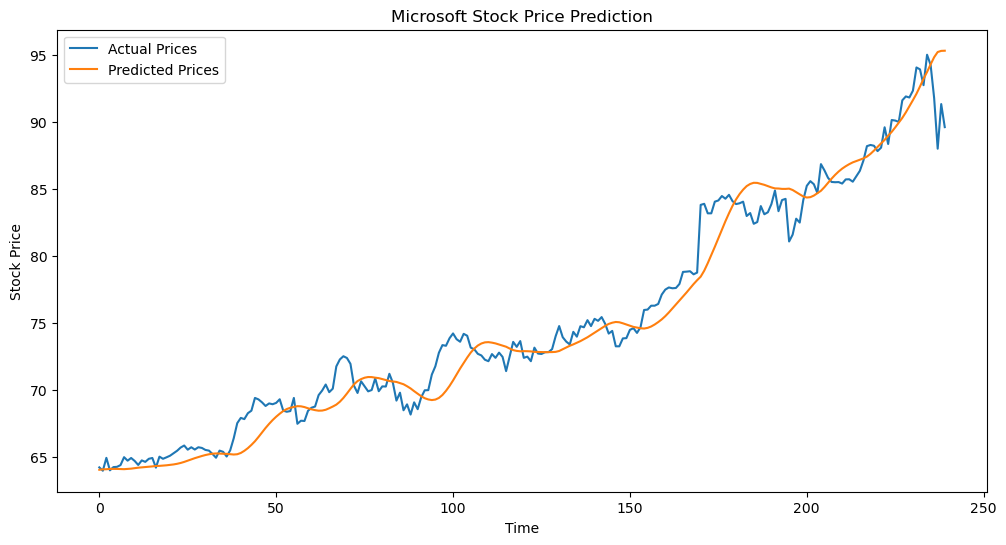

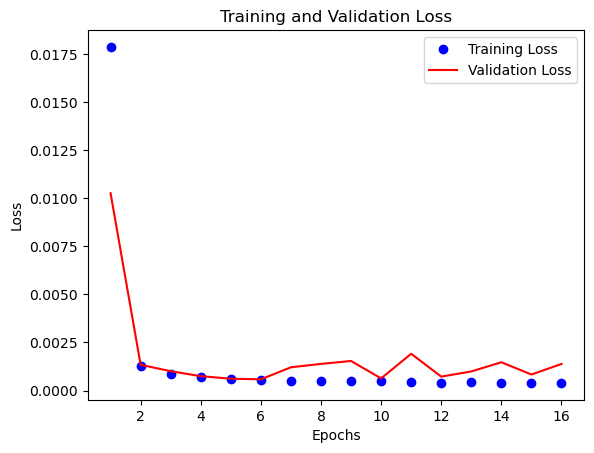

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
microsoft = pd.read_csv('MicrosoftStock.csv')
microsoft['date'] = pd.to_datetime(microsoft['date'])
microsoft.set_index('date', inplace=True)

# Prepare the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(microsoft['close'].values.reshape(-1, 1))

# Function to create sequences and labels
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length:i+seq_length+1]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences and labels
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Build the model
model = Sequential()
model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # standard linear output function for final layer 

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') # adam optimizer used with MSE 

# Early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop, reduce_lr])

# Reshape X_test for inverse transformation
X_test_reshaped = X_test.reshape(-1, sequence_length)

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Reshape y_test for inverse transformation
y_test_reshaped = y_test.reshape(-1, 1)
y_test_inverse = scaler.inverse_transform(y_test_reshaped)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a range of epochs for x-axis
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()


In [7]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


NameError: name 'history' is not defined

Epoch 1/20


2023-10-28 18:28:30.326034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-10-28 18:28:30.457075: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_12.


30/30 [==============================] - ETA: 0s - loss: 0.0149

2023-10-28 18:31:19.636433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 172s 6s/step - loss: 0.0149 - val_loss: 0.0034 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - 176s 6s/step - loss: 0.0042 - val_loss: 0.0040 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - 172s 6s/step - loss: 0.0036 - val_loss: 0.0029 - lr: 0.0010
Epoch 4/20
30/30 [==============================] - 191s 6s/step - loss: 0.0032 - val_loss: 0.0023 - lr: 0.0010
Epoch 5/20
30/30 [==============================] - 185s 6s/step - loss: 0.0026 - val_loss: 0.0024 - lr: 0.0010
Epoch 6/20
30/30 [==============================] - 178s 6s/step - loss: 0.0029 - val_loss: 0.0032 - lr: 0.0010
Epoch 7/20
30/30 [==============================] - 306s 10s/step - loss: 0.0024 - val_loss: 0.0025 - lr: 0.0010
Epoch 8/20
30/30 [==============================] - 176s 6s/step - loss: 0.0022 - val_loss: 0.0021 - lr: 0.0010
Epoch 9/20
30/30 [==============================] - 172s 6s/step - loss: 0.0022 - val_loss: 0.0022 - lr: 0.0010
Ep

2023-10-28 19:33:52.411910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 3s 335ms/step


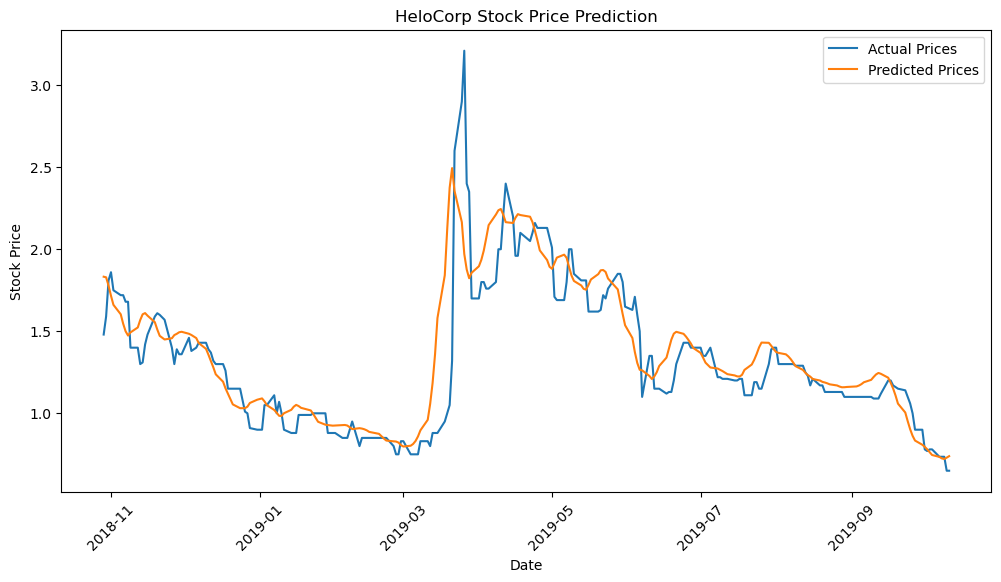

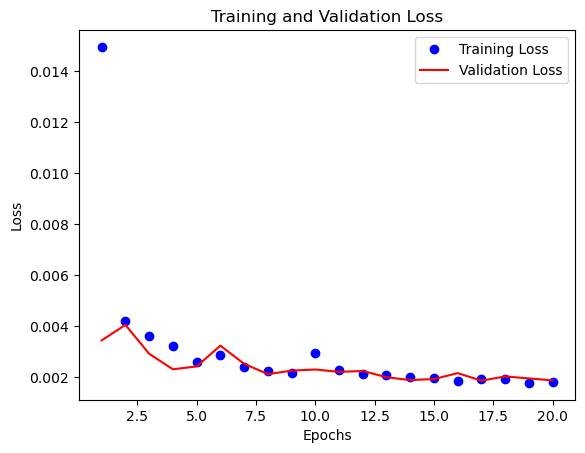

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
microsoft = pd.read_csv('HistoricalData_1698522158374.csv')
microsoft['date'] = pd.to_datetime(microsoft['date'])
microsoft.set_index('date', inplace=True)

# Prepare the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(microsoft['close'].values.reshape(-1, 1))

# Function to create sequences and labels
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length:i+seq_length+1]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences and labels
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Build the model
model = Sequential()
model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # standard linear output function for final layer 

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') # adam optimizer used with MSE 

# Early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop, reduce_lr])

# Reshape X_test for inverse transformation
X_test_reshaped = X_test.reshape(-1, sequence_length)

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Reshape y_test for inverse transformation
y_test_reshaped = y_test.reshape(-1, 1)
y_test_inverse = scaler.inverse_transform(y_test_reshaped)

#EXTRA PART


# Load the data
microsoft = pd.read_csv('HistoricalData_1698522158374.csv')
microsoft['date'] = pd.to_datetime(microsoft['date'])
microsoft.set_index('date', inplace=True)

# Extract dates for the test set
test_dates = microsoft.index[train_size + sequence_length:]

# Visualize the results with dates
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_inverse, label='Actual Prices')
plt.plot(test_dates, predictions, label='Predicted Prices')
plt.title('HeloCorp Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



####


# # Visualize the results
# plt.figure(figsize=(12, 6))
# plt.plot(y_test_inverse, label='Actual Prices')
# plt.plot(predictions, label='Predicted Prices')
# plt.title('HeloCorp Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()


# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a range of epochs for x-axis
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()

In [2]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('HistoricalData_1698988520686.csv')

# Loop through the columns and replace $value with just value
for col in df.columns:
    if df[col].dtype == object:  # Check if the column contains strings
        df[col] = df[col].replace(r'\$(\d+\.\d+)', r'\1', regex=True)

# Save the modified DataFrame back to a CSV file
df.to_csv('HistoricalData_1698988520686.csv', index=False)
print("conversion done")


conversion done


2023-11-03 02:33:39.507339: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-03 02:33:39.507385: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-03 02:33:39.507390: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-03 02:33:39.507790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-03 02:33:39.508150: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2023-11-03 02:33:40.309115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-03 02:33:40.431003: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_12.


30/30 [==============================] - ETA: 0s - loss: 0.0728

2023-11-03 02:36:38.198876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 181s 6s/step - loss: 0.0728 - val_loss: 0.0242 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - 850s 29s/step - loss: 0.0053 - val_loss: 0.0125 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - 369s 13s/step - loss: 0.0036 - val_loss: 0.0031 - lr: 0.0010
Epoch 4/20
30/30 [==============================] - 172s 6s/step - loss: 0.0029 - val_loss: 0.0023 - lr: 0.0010
Epoch 5/20
30/30 [==============================] - 186s 6s/step - loss: 0.0025 - val_loss: 0.0015 - lr: 0.0010
Epoch 6/20
30/30 [==============================] - 189s 6s/step - loss: 0.0022 - val_loss: 0.0012 - lr: 0.0010
Epoch 7/20
30/30 [==============================] - 192s 6s/step - loss: 0.0019 - val_loss: 2.7082e-04 - lr: 0.0010
Epoch 8/20
30/30 [==============================] - 179s 6s/step - loss: 0.0019 - val_loss: 3.1726e-04 - lr: 0.0010
Epoch 9/20
30/30 [==============================] - 178s 6s/step - loss: 0.0017 - val_loss: 5.5209e-04 - 

2023-11-03 03:39:59.283581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 3s 332ms/step


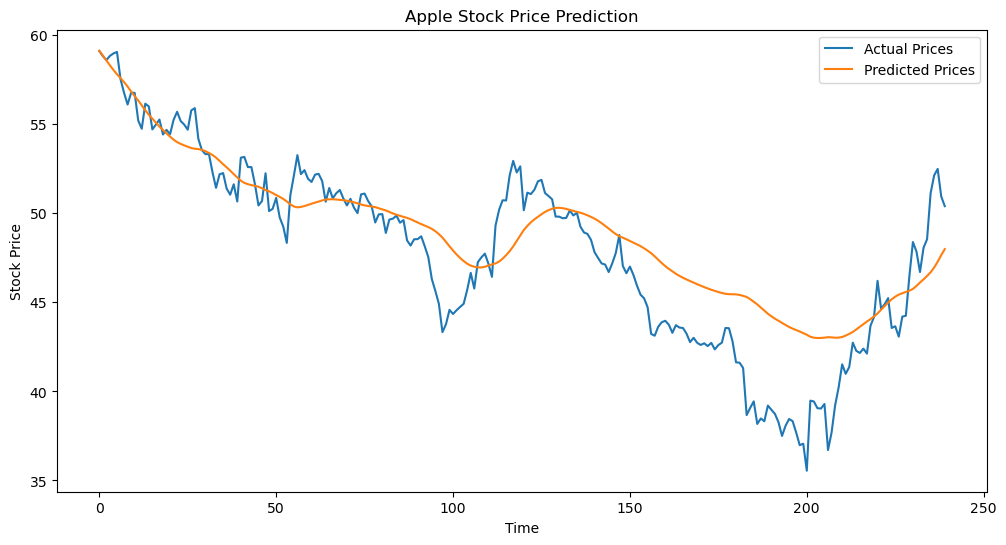

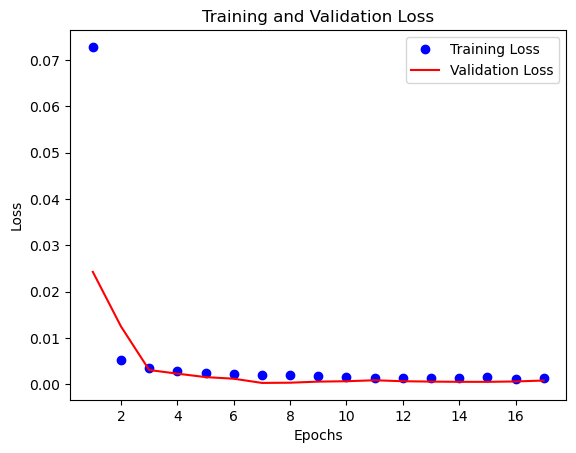

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
microsoft = pd.read_csv('HistoricalData_1698988520686.csv')
microsoft['date'] = pd.to_datetime(microsoft['date'])
microsoft.set_index('date', inplace=True)

# Prepare the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(microsoft['close'].values.reshape(-1, 1))

# Function to create sequences and labels
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length:i+seq_length+1]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences and labels
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Build the model
model = Sequential()
model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # standard linear output function for final layer 

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') # adam optimizer used with MSE 

# Early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop, reduce_lr])

# Reshape X_test for inverse transformation
X_test_reshaped = X_test.reshape(-1, sequence_length)

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Reshape y_test for inverse transformation
y_test_reshaped = y_test.reshape(-1, 1)
y_test_inverse = scaler.inverse_transform(y_test_reshaped)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a range of epochs for x-axis
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation losses
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()